In [1]:


from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd 
import os
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [2]:
model = tf.keras.models.load_model("./model.h5")

In [5]:
data = pd.read_csv('AIMC.csv')
data.dropna(inplace=True)
data.head()

data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()
df = data.drop('Date', axis=1)

print(df)

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 4] - first) / first)
    temp2.append((df.iloc[i + window_size, 4] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

C:\Users\Hufal\AppData\Local\Temp/ipykernel_28384/3576095143.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


       Low   Open     Volume   High  Close  Adjusted Close
0    13.36  13.50  5134900.0  14.29  14.29       12.240658
1    13.53  13.90   426100.0  14.22  13.99       11.983682
2    13.50  13.70   289000.0  13.80  13.79       11.812362
3    13.50  13.50   155400.0  13.80  13.75       11.778097
4    13.60  13.70   184700.0  14.55  14.55       12.463370
..     ...    ...        ...    ...    ...             ...
588   4.23   4.55   530900.0   4.80   4.51        3.863216
589   4.43   4.43   439600.0   5.02   4.84        4.145890
590   4.37   4.87   472600.0   5.02   4.53        3.880349
591   4.53   4.57   516300.0   5.19   5.12        4.385736
592   4.86   4.95   190800.0   5.15   5.05        4.325775

[593 rows x 6 columns]
392
99


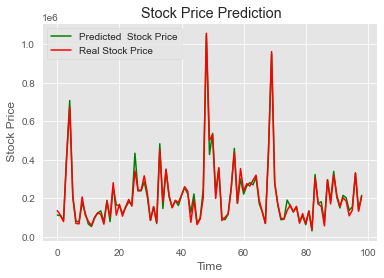

In [6]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [7]:
from tensorflow import keras
yActual = test_label
yPredicted = predicted
 
mapeObject = keras.losses.MeanAbsolutePercentageError()
mapeTensor = mapeObject(yActual, yPredicted)
mape = mapeTensor.numpy()
 
print(mape)

9.1114645
